# Dataset Merging
Author: Oscar Janossy   
Date: 2025-05-19  
Description: Collection of all dataset retrieved from the different sources. Cleaning of the data to form only a single dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:


# Define start and end dates
start_date = "2017-12-31 23:00:00+00:00"
end_date = "2024-12-31 22:45:00+00:00"

# Create date range with 15-minute frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='30min')

# Create the dataframe
df = pd.DataFrame({'start_date': date_range})

# Display info about the dataframe
print(f"DataFrame shape: {df.shape}")
print(f"Start: {df.start_date.min()}")
print(f"End: {df.start_date.max()}")
print(f"Total rows: {len(df)}")
print(f"Sample of the first 5 rows:")
df

DataFrame shape: (122736, 1)
Start: 2017-12-31 23:00:00+00:00
End: 2024-12-31 22:30:00+00:00
Total rows: 122736
Sample of the first 5 rows:


,start_date
0,2017-12-31 23:00:00+00:00
1,2017-12-31 23:30:00+00:00
2,2018-01-01 00:00:00+00:00
3,2018-01-01 00:30:00+00:00
4,2018-01-01 01:00:00+00:00
...,...
122731,2024-12-31 20:30:00+00:00
122732,2024-12-31 21:00:00+00:00
122733,2024-12-31 21:30:00+00:00
122734,2024-12-31 22:00:00+00:00


In [ ]:
df_mix = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\data_mix_api_2014.csv')
df_mix


In [89]:


# Transform start_date to the desired datetime format
df_mix['start_date'] = pd.to_datetime(df_mix['start_date'], utc = True)#.dt.strftime('%Y-%m-%dT%H:%M:%S%z')

In [90]:
# Set 'start_date' as the index for resampling
df_mix.set_index('start_date', inplace=True)

# Resample to 30-minute frequency and calculate the mean
df_mix = df_mix.resample('30T').mean()

# Reset the index to make 'start_date' a column again
df_mix.reset_index(inplace=True)

# Filter the resampled dataframe to keep only data after 2016-12-31 23:00:00+00:00
df_mix = df_mix[df_mix['start_date'] >= '2017-12-31 23:00:00+00:00']

df_mix

C:\Users\Oscar\AppData\Local\Temp\ipykernel_17080\284964584.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_mix = df_mix.resample('30T').mean()


,start_date,EXCHANGE - TOTAL,FOSSIL_GAS - TOTAL,NUCLEAR - TOTAL,SOLAR - TOTAL,WIND - TOTAL
17520,2017-12-31 23:00:00+00:00,-649.0,2282.5,39628.0,0.0,9848.0
17521,2017-12-31 23:30:00+00:00,469.5,2305.0,36348.0,0.0,9795.5
17522,2018-01-01 00:00:00+00:00,1396.0,2312.5,34996.5,0.0,9734.5
17523,2018-01-01 00:30:00+00:00,1593.0,2317.5,34698.5,0.0,9659.0
17524,2018-01-01 01:00:00+00:00,1993.0,2300.5,34449.5,0.0,9608.5
...,...,...,...,...,...,...
140251,2024-12-31 20:30:00+00:00,NaN,1881.5,50120.5,280.5,9904.0
140252,2024-12-31 21:00:00+00:00,NaN,1876.5,50158.0,281.5,10011.5
140253,2024-12-31 21:30:00+00:00,NaN,2071.5,50536.0,281.0,10201.5
140254,2024-12-31 22:00:00+00:00,NaN,2141.5,50774.0,282.5,10434.5


In [91]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122736 entries, 17520 to 140255
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   start_date          122736 non-null  datetime64[ns, UTC]
 1   EXCHANGE - TOTAL    100281 non-null  float64            
 2   FOSSIL_GAS - TOTAL  122665 non-null  float64            
 3   NUCLEAR - TOTAL     122665 non-null  float64            
 4   SOLAR - TOTAL       122665 non-null  float64            
 5   WIND - TOTAL        122665 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 6.6 MB


In [92]:
from sklearn.impute import KNNImputer

cols_to_impute = ['FOSSIL_GAS - TOTAL', 'NUCLEAR - TOTAL', 'SOLAR - TOTAL', 'WIND - TOTAL']
imputer = KNNImputer(n_neighbors=7)
df_mix[cols_to_impute] = imputer.fit_transform(df_mix[cols_to_impute])

### Forecast

In [14]:
df_forecasts = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\data_forecast_api.csv')
df_forecasts['start_date'] = pd.to_datetime(df_forecasts['start_date'], utc = True)
df_forecasts = df_forecasts[df_forecasts['start_date'] >= '2017-12-31 23:00:00+00:00']
df_forecasts


,start_date,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,WIND_OFFSHORE - D-1,WIND_OFFSHORE - ID,WIND_OFFSHORE - CURRENT
24090,2017-12-31 23:00:00+00:00,10081.00,9839.00,9839.00,0.0,NaN,0.0,NaN,NaN,NaN
24091,2018-01-01 00:00:00+00:00,10014.00,9802.00,9802.00,0.0,NaN,0.0,NaN,NaN,NaN
24092,2018-01-01 01:00:00+00:00,9596.00,9633.00,9633.00,0.0,NaN,0.0,NaN,NaN,NaN
24093,2018-01-01 02:00:00+00:00,9169.00,9458.00,9458.00,0.0,NaN,0.0,NaN,NaN,NaN
24094,2018-01-01 03:00:00+00:00,8740.00,9281.00,9281.00,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
80238,2024-12-31 18:00:00+00:00,8132.01,8788.28,8841.83,0.0,0.0,0.0,1194.00,1211.25,1211.25
80239,2024-12-31 19:00:00+00:00,8501.19,9114.07,9155.38,0.0,0.0,0.0,1215.00,1226.00,1226.00
80240,2024-12-31 20:00:00+00:00,8874.64,9441.05,9474.97,0.0,0.0,0.0,1231.50,1238.50,1238.50
80241,2024-12-31 21:00:00+00:00,9249.27,9755.22,9796.29,0.0,0.0,0.0,1247.00,1262.25,1262.25


In [15]:
# Fill missing values in ID forecasts with D-1 forecasts where available

# For WIND_OFFSHORE - ID column
mask = df_forecasts['WIND_OFFSHORE - ID'].isna() & df_forecasts['WIND_OFFSHORE - D-1'].notna()
df_forecasts.loc[mask, 'WIND_OFFSHORE - ID'] = df_forecasts.loc[mask, 'WIND_OFFSHORE - D-1']

# For SOLAR - ID column
mask = df_forecasts['SOLAR - ID'].isna() & df_forecasts['SOLAR - D-1'].notna()
df_forecasts.loc[mask, 'SOLAR - ID'] = df_forecasts.loc[mask, 'SOLAR - D-1']

# For WIND_ONSHORE - ID column
mask = df_forecasts['WIND_ONSHORE - ID'].isna() & df_forecasts['WIND_ONSHORE - D-1'].notna()
df_forecasts.loc[mask, 'WIND_ONSHORE - ID'] = df_forecasts.loc[mask, 'WIND_ONSHORE - D-1']

# Print number of remaining missing values after filling
print(f"Missing values in WIND_OFFSHORE - ID: {df_forecasts['WIND_OFFSHORE - ID'].isna().sum()}")
print(f"Missing values in SOLAR - ID: {df_forecasts['SOLAR - ID'].isna().sum()}")
print(f"Missing values in WIND_ONSHORE - ID: {df_forecasts['WIND_ONSHORE - ID'].isna().sum()}")

Missing values in WIND_OFFSHORE - ID: 44816
Missing values in SOLAR - ID: 245
Missing values in WIND_ONSHORE - ID: 119


In [16]:
df_forecasts

,start_date,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,WIND_OFFSHORE - D-1,WIND_OFFSHORE - ID,WIND_OFFSHORE - CURRENT
24090,2017-12-31 23:00:00+00:00,10081.00,9839.00,9839.00,0.0,0.0,0.0,NaN,NaN,NaN
24091,2018-01-01 00:00:00+00:00,10014.00,9802.00,9802.00,0.0,0.0,0.0,NaN,NaN,NaN
24092,2018-01-01 01:00:00+00:00,9596.00,9633.00,9633.00,0.0,0.0,0.0,NaN,NaN,NaN
24093,2018-01-01 02:00:00+00:00,9169.00,9458.00,9458.00,0.0,0.0,0.0,NaN,NaN,NaN
24094,2018-01-01 03:00:00+00:00,8740.00,9281.00,9281.00,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
80238,2024-12-31 18:00:00+00:00,8132.01,8788.28,8841.83,0.0,0.0,0.0,1194.00,1211.25,1211.25
80239,2024-12-31 19:00:00+00:00,8501.19,9114.07,9155.38,0.0,0.0,0.0,1215.00,1226.00,1226.00
80240,2024-12-31 20:00:00+00:00,8874.64,9441.05,9474.97,0.0,0.0,0.0,1231.50,1238.50,1238.50
80241,2024-12-31 21:00:00+00:00,9249.27,9755.22,9796.29,0.0,0.0,0.0,1247.00,1262.25,1262.25


In [17]:
df_forecasts["WIND Total D-1"] = df_forecasts["WIND_ONSHORE - D-1"].fillna(0) + df_forecasts["WIND_OFFSHORE - D-1"].fillna(0)
df_forecasts['WIND Total ID'] = df_forecasts["WIND_ONSHORE - ID"].fillna(0) + df_forecasts["WIND_OFFSHORE - ID"].fillna(0)
df_forecasts['WIND CURRENT'] = df_forecasts["WIND_ONSHORE - CURRENT"].fillna(0) + df_forecasts["WIND_OFFSHORE - CURRENT"].fillna(0)

In [18]:
df_forecasts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56153 entries, 24090 to 80242
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   start_date               56153 non-null  datetime64[ns, UTC]
 1   WIND_ONSHORE - D-1       54827 non-null  float64            
 2   WIND_ONSHORE - ID        56034 non-null  float64            
 3   WIND_ONSHORE - CURRENT   56114 non-null  float64            
 4   SOLAR - D-1              55740 non-null  float64            
 5   SOLAR - ID               55908 non-null  float64            
 6   SOLAR - CURRENT          56020 non-null  float64            
 7   WIND_OFFSHORE - D-1      11206 non-null  float64            
 8   WIND_OFFSHORE - ID       11337 non-null  float64            
 9   WIND_OFFSHORE - CURRENT  11337 non-null  float64            
 10  WIND Total D-1           56153 non-null  float64            
 11  WIND Total ID            5615

In [19]:
# Identify and drop columns with "OFFSHORE" in their name from df_forecasts
offshore_cols = [col for col in df_forecasts.columns if "OFFSHORE" in col]
df_forecasts = df_forecasts.drop(columns=offshore_cols)
print("Dropped offshore columns:", offshore_cols)

Dropped offshore columns: ['WIND_OFFSHORE - D-1', 'WIND_OFFSHORE - ID', 'WIND_OFFSHORE - CURRENT']


In [21]:
# Convert start_date set as the index

df_forecasts.set_index('start_date', inplace=True)

# Create a new date range with 15-minute frequency
new_index = pd.date_range(start=df_forecasts.index.min(), end=df_forecasts.index.max() + pd.Timedelta(minutes=60), freq='30min')

# Reindex the dataframe to the new date range
df_forecasts = df_forecasts.reindex(new_index)

# Forward fill the new rows
df_forecasts.interpolate(method='time', inplace=True)

# Reset the index to make start_date a column again
df_forecasts.reset_index(inplace=True)
df_forecasts.rename(columns={'index': 'start_date'}, inplace=True)

df_forecasts

,start_date,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,WIND Total D-1,WIND Total ID,WIND CURRENT
0,2017-12-31 23:00:00+00:00,10081.00,9839.00,9839.00,0.0,0.0,0.0,10081.00,9839.00,9839.00
1,2017-12-31 23:30:00+00:00,10047.50,9820.50,9820.50,0.0,0.0,0.0,10047.50,9820.50,9820.50
2,2018-01-01 00:00:00+00:00,10014.00,9802.00,9802.00,0.0,0.0,0.0,10014.00,9802.00,9802.00
3,2018-01-01 00:30:00+00:00,9805.00,9717.50,9717.50,0.0,0.0,0.0,9805.00,9717.50,9717.50
4,2018-01-01 01:00:00+00:00,9596.00,9633.00,9633.00,0.0,0.0,0.0,9596.00,9633.00,9633.00
...,...,...,...,...,...,...,...,...,...,...
122734,2024-12-31 22:00:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122735,2024-12-31 22:30:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122736,2024-12-31 23:00:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122737,2024-12-31 23:30:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12


In [22]:
# Convert all columns except 'start_date' to numeric with 2 decimal places
numeric_columns = [col for col in df_forecasts.columns if col != 'start_date']

for col in numeric_columns:
    try:
        # Convert to numeric first in case there are non-numeric values
        df_forecasts[col] = pd.to_numeric(df_forecasts[col], errors='coerce')
        # Round to 2 decimal places
        df_forecasts[col] = df_forecasts[col].round(2)
    except Exception as e:
        print(f"Error processing column {col}: {e}")

# Print the result for verification
print(f"All numeric columns have been converted to 2 decimal places. DataFrame shape: {df_forecasts.shape}")

All numeric columns have been converted to 2 decimal places. DataFrame shape: (122739, 10)


In [23]:
df_forecasts

,start_date,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,WIND Total D-1,WIND Total ID,WIND CURRENT
0,2017-12-31 23:00:00+00:00,10081.00,9839.00,9839.00,0.0,0.0,0.0,10081.00,9839.00,9839.00
1,2017-12-31 23:30:00+00:00,10047.50,9820.50,9820.50,0.0,0.0,0.0,10047.50,9820.50,9820.50
2,2018-01-01 00:00:00+00:00,10014.00,9802.00,9802.00,0.0,0.0,0.0,10014.00,9802.00,9802.00
3,2018-01-01 00:30:00+00:00,9805.00,9717.50,9717.50,0.0,0.0,0.0,9805.00,9717.50,9717.50
4,2018-01-01 01:00:00+00:00,9596.00,9633.00,9633.00,0.0,0.0,0.0,9596.00,9633.00,9633.00
...,...,...,...,...,...,...,...,...,...,...
122734,2024-12-31 22:00:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122735,2024-12-31 22:30:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122736,2024-12-31 23:00:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12
122737,2024-12-31 23:30:00+00:00,9576.33,9876.67,9909.12,0.0,0.0,0.0,10838.58,11145.67,11178.12


In [24]:
# Filter rows for the date 2023-03-29

df_filtered = df_forecasts[df_forecasts['start_date'].dt.date == pd.to_datetime('2023-03-26').date()]
df_filtered

,start_date,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,WIND Total D-1,WIND Total ID,WIND CURRENT
91682,2023-03-26 00:00:00+00:00,6499.43,7359.54,7338.36,0.0,0.00,0.00,4585.07,7359.54,7338.36
91683,2023-03-26 00:30:00+00:00,6519.52,7710.05,7690.99,0.0,0.00,0.00,4126.56,7710.05,7690.99
91684,2023-03-26 01:00:00+00:00,6539.60,8060.56,8043.62,0.0,0.00,0.00,3668.06,8060.56,8043.62
91685,2023-03-26 01:30:00+00:00,6559.68,8411.08,8396.25,0.0,0.00,0.00,3209.55,8411.08,8396.25
91686,2023-03-26 02:00:00+00:00,6579.77,8761.59,8748.88,0.0,0.00,0.00,2751.04,8761.59,8748.88
91687,2023-03-26 02:30:00+00:00,6599.85,9112.10,9101.51,0.0,0.00,0.00,2292.54,9112.10,9101.51
91688,2023-03-26 03:00:00+00:00,6619.93,9462.61,9454.14,0.0,0.00,0.00,1834.03,9462.61,9454.14
91689,2023-03-26 03:30:00+00:00,6640.02,9813.12,9806.77,0.0,0.00,0.00,1375.52,9813.12,9806.77
91690,2023-03-26 04:00:00+00:00,6660.10,10163.64,10159.40,0.0,0.00,0.00,917.01,10163.64,10159.40
91691,2023-03-26 04:30:00+00:00,6680.18,10514.15,10512.03,0.0,0.00,0.00,458.51,10514.15,10512.03


## Import consumption data

In [26]:
df_conso = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\conso_2017-2024.csv', parse_dates=['start_date'])
df_conso

,start_date,Consumption D-1,Consumption ID,Actual Consumption
0,2016-12-31 23:00:00+00:00,76100.0,76500.0,76432
1,2016-12-31 23:15:00+00:00,75500.0,75800.0,76161
2,2016-12-31 23:30:00+00:00,74900.0,75100.0,75123
3,2016-12-31 23:45:00+00:00,74150.0,74250.0,74032
4,2017-01-01 00:00:00+00:00,73400.0,73400.0,73369
...,...,...,...,...
280276,2024-12-31 21:45:00+00:00,61700.0,61900.0,64903
280277,2024-12-31 22:00:00+00:00,64200.0,64300.0,64732
280278,2024-12-31 22:15:00+00:00,64200.0,64300.0,64720
280279,2024-12-31 22:30:00+00:00,64800.0,64800.0,64369


In [27]:
df_conso = df_conso[df_conso['start_date'] >= '2017-12-31 23:00:00+00:00']

In [28]:
# Set start_date as the index
df_conso.set_index('start_date', inplace=True)

# Remove duplicate indices
df_conso = df_conso[~df_conso.index.duplicated(keep='first')]

df_conso.reset_index(inplace=True)

df_conso

,start_date,Consumption D-1,Consumption ID,Actual Consumption
0,2017-12-31 23:00:00+00:00,56800.0,58900.0,58882
1,2017-12-31 23:15:00+00:00,56250.0,58300.0,58849
2,2017-12-31 23:30:00+00:00,55700.0,57700.0,57677
3,2017-12-31 23:45:00+00:00,54800.0,56750.0,56520
4,2018-01-01 00:00:00+00:00,53900.0,55800.0,55957
...,...,...,...,...
245209,2024-12-31 21:45:00+00:00,61700.0,61900.0,64903
245210,2024-12-31 22:00:00+00:00,64200.0,64300.0,64732
245211,2024-12-31 22:15:00+00:00,64200.0,64300.0,64720
245212,2024-12-31 22:30:00+00:00,64800.0,64800.0,64369


In [29]:
# Convert start_date set as the index

df_conso.set_index('start_date', inplace=True)

# Create a new date range with 15-minute frequency
new_index = pd.date_range(start=df_conso.index.min(), end=df_conso.index.max() + pd.Timedelta(minutes=6), freq='30min')

# Reindex the dataframe to the new date range
df_conso = df_conso.reindex(new_index)

# Forward fill the new rows
df_conso.interpolate(method='time', inplace=True)

# Reset the index to make start_date a column again
df_conso.reset_index(inplace=True)
df_conso.rename(columns={'index': 'start_date'}, inplace=True)

df_conso

,start_date,Consumption D-1,Consumption ID,Actual Consumption
0,2017-12-31 23:00:00+00:00,56800.0,58900.0,58882.0
1,2017-12-31 23:30:00+00:00,55700.0,57700.0,57677.0
2,2018-01-01 00:00:00+00:00,53900.0,55800.0,55957.0
3,2018-01-01 00:30:00+00:00,54700.0,56600.0,55912.0
4,2018-01-01 01:00:00+00:00,54200.0,56200.0,55429.0
...,...,...,...,...
122731,2024-12-31 20:30:00+00:00,61600.0,62000.0,63136.0
122732,2024-12-31 21:00:00+00:00,60800.0,61100.0,62111.0
122733,2024-12-31 21:30:00+00:00,61700.0,61900.0,63182.0
122734,2024-12-31 22:00:00+00:00,64200.0,64300.0,64732.0


In [30]:
duplicates = df_conso.index[df_conso['start_date'].duplicated()]
df_duplicates = df_conso.loc[duplicates]
df_duplicates

,start_date,Consumption D-1,Consumption ID,Actual Consumption


### Load forecat

In [31]:
df_load_forecast = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\load_forecast_2015-2024.csv', parse_dates=['Datetime'])
df_load_forecast['start_date'] = pd.to_datetime(df_load_forecast['Datetime'])
df_load_forecast.drop(columns=['Datetime'], inplace=True)
df_load_forecast = df_load_forecast[df_load_forecast['start_date'] >= '2017-12-31 23:00:00+00:00']
df_load_forecast

,DA Total Load Forecast,Actual Total Load,start_date
26303,56250.0,57638.0,2017-12-31 23:00:00+00:00
26304,54300.0,56036.0,2018-01-01 00:00:00+00:00
26305,53600.0,54494.0,2018-01-01 01:00:00+00:00
26306,50000.0,51574.0,2018-01-01 02:00:00+00:00
26307,47100.0,49370.0,2018-01-01 03:00:00+00:00
...,...,...,...
87667,65200.0,65266.0,2024-12-31 19:00:00+00:00
87668,62200.0,62886.0,2024-12-31 20:00:00+00:00
87669,61250.0,63983.0,2024-12-31 21:00:00+00:00
87670,64500.0,64603.0,2024-12-31 22:00:00+00:00


In [32]:
# Convert start_date set as the index

df_load_forecast.set_index('start_date', inplace=True)

# Create a new date range with 15-minute frequency
new_index = pd.date_range(start=df_load_forecast.index.min(), end=df_load_forecast.index.max() + pd.Timedelta(minutes=60), freq='30min')

# Reindex the dataframe to the new date range
df_load_forecast = df_load_forecast.reindex(new_index)

# Forward fill the new rows
df_load_forecast.interpolate(method='time', inplace=True)

# Reset the index to make start_date a column again
df_load_forecast.reset_index(inplace=True)
df_load_forecast.rename(columns={'index': 'start_date'}, inplace=True)

df_load_forecast

,start_date,DA Total Load Forecast,Actual Total Load
0,2017-12-31 23:00:00+00:00,56250.00,57638.0
1,2017-12-31 23:30:00+00:00,55275.00,56837.0
2,2018-01-01 00:00:00+00:00,54300.00,56036.0
3,2018-01-01 00:30:00+00:00,53950.00,55265.0
4,2018-01-01 01:00:00+00:00,53600.00,54494.0
...,...,...,...
122734,2024-12-31 22:00:00+00:00,64500.00,64603.0
122735,2024-12-31 22:30:00+00:00,63743.75,64603.0
122736,2024-12-31 23:00:00+00:00,62987.50,64603.0
122737,2024-12-31 23:30:00+00:00,62987.50,64603.0


## Programmable forecast

In [36]:
df_programable = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\program_forecast.csv', parse_dates=['start_date'])
df_programable

,start_date,AGGREGATED_PROGRAMMABLE_FRANCE - D-1,AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1
0,2014-12-31 23:00:00+00:00,69088.0,7817.0
1,2014-12-31 23:30:00+00:00,68521.0,7673.0
2,2015-01-01 00:00:00+00:00,67870.0,7622.0
3,2015-01-01 00:30:00+00:00,67775.0,7649.0
4,2015-01-01 01:00:00+00:00,66787.0,7607.0
...,...,...,...
175340,2024-12-31 21:00:00+00:00,51387.0,3600.0
175341,2024-12-31 21:30:00+00:00,52241.0,3596.0
175342,2024-12-31 22:00:00+00:00,52523.0,3577.0
175343,2024-12-31 22:30:00+00:00,52462.0,3571.0


In [37]:
df_programable =df_programable[df_programable['start_date'] >= '2017-12-31 23:00:00+00:00']

In [38]:
# Find rows where AGGREGATED_PROGRAMMABLE_FRANCE - D-1 is smaller than AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1
mask = df_programable['AGGREGATED_PROGRAMMABLE_FRANCE - D-1'] < df_programable['AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1']
filtered_df = df_programable[mask]
# Swap the values in both columns for rows where the condition is met
temp = df_programable.loc[mask, 'AGGREGATED_PROGRAMMABLE_FRANCE - D-1'].copy()
df_programable.loc[mask, 'AGGREGATED_PROGRAMMABLE_FRANCE - D-1'] = df_programable.loc[mask, 'AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1']
df_programable.loc[mask, 'AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1'] = temp


### Generation forecast

In [39]:
df_generation = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\generation_forecast_2017-2024.csv')
df_generation['Datetime'] = pd.to_datetime(df_generation['Datetime'])
df_generation

,Datetime,DA Total Generation Forecast,Actual Generation (MW)
0,2017-01-01 00:00:00+00:00,69539.000,68721.00
1,2017-01-01 00:15:00+00:00,68998.250,68469.25
2,2017-01-01 00:30:00+00:00,68457.500,68217.50
3,2017-01-01 00:45:00+00:00,67916.750,67965.75
4,2017-01-01 01:00:00+00:00,67376.000,67714.00
...,...,...,...
280504,2024-12-31 22:00:00+00:00,63570.000,0.00
280505,2024-12-31 22:15:00+00:00,62132.375,0.00
280506,2024-12-31 22:30:00+00:00,60694.750,0.00
280507,2024-12-31 22:45:00+00:00,59257.125,0.00


In [41]:
df_generation = df_generation[df_generation['Datetime'] >= '2017-12-31 23:00:00+00:00']

In [42]:
df_generation.loc[df_generation['Datetime'] == '2024-12-18 23:15:00+00:00', 'Actual Generation (MW)'] = df_generation.loc[df_generation['Datetime'] == '2024-12-18 23:15:00+00:00', 'Actual Generation (MW)'] /2

df_generation.loc[df_generation['Datetime'] == '2024-12-18 23:30:00+00:00', 'Actual Generation (MW)'] = df_generation.loc[df_generation['Datetime'] == '2024-12-18 23:30:00+00:00', 'Actual Generation (MW)'] /3

df_generation.loc[df_generation['Datetime'] >= '2024-12-18 23:45:00+00:00', 'Actual Generation (MW)'] = df_generation.loc[df_generation['Datetime'] >= '2024-12-18 23:45:00+00:00', 'Actual Generation (MW)'] /4
df_generation

,Datetime,DA Total Generation Forecast,Actual Generation (MW)
35036,2017-12-31 23:00:00+00:00,56525.500,58146.00
35037,2017-12-31 23:15:00+00:00,55800.250,57493.75
35038,2017-12-31 23:30:00+00:00,55075.000,56841.50
35039,2017-12-31 23:45:00+00:00,54349.750,56189.25
35040,2018-01-01 00:00:00+00:00,53624.500,55537.00
...,...,...,...
280504,2024-12-31 22:00:00+00:00,63570.000,0.00
280505,2024-12-31 22:15:00+00:00,62132.375,0.00
280506,2024-12-31 22:30:00+00:00,60694.750,0.00
280507,2024-12-31 22:45:00+00:00,59257.125,0.00


In [43]:
df_generation.rename(columns={'Datetime': 'start_date'}, inplace=True)


C:\Users\Oscar\AppData\Local\Temp\ipykernel_17080\2306574518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generation.rename(columns={'Datetime': 'start_date'}, inplace=True)


In [44]:
# Convert start_date set as the index

df_generation.set_index('start_date', inplace=True)

# Create a new date range with 15-minute frequency
new_index = pd.date_range(start=df_generation.index.min(), end=df_generation.index.max() + pd.Timedelta(minutes=60), freq='30min')

# Reindex the dataframe to the new date range
df_generation = df_generation.reindex(new_index)

# Forward fill the new rows
df_generation.interpolate(method='time', inplace=True)

# Reset the index to make start_date a column again
df_generation.reset_index(inplace=True)
df_generation.rename(columns={'index': 'start_date'}, inplace=True)

df_generation

,start_date,DA Total Generation Forecast,Actual Generation (MW)
0,2017-12-31 23:00:00+00:00,56525.50,58146.0
1,2017-12-31 23:30:00+00:00,55075.00,56841.5
2,2018-01-01 00:00:00+00:00,53624.50,55537.0
3,2018-01-01 00:30:00+00:00,53011.25,54763.5
4,2018-01-01 01:00:00+00:00,52398.00,53990.0
...,...,...,...
122734,2024-12-31 22:00:00+00:00,63570.00,0.0
122735,2024-12-31 22:30:00+00:00,60694.75,0.0
122736,2024-12-31 23:00:00+00:00,57819.50,0.0
122737,2024-12-31 23:30:00+00:00,57819.50,0.0


### Balancing energy

In [ ]:
df_balance_energy = pd.read_csv(r'D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\data_energy_volume_api.csv', parse_dates=['start_date'])
df_balance_energy = df_balance_energy[df_balance_energy['start_date'] >= '2017-12-31 23:00:00+00:00']
df_balance_energy = df_balance_energy[['start_date', 'upward_volume_balancing', 'downward_volume_balancing']]



In [ ]:
df_balance_energy = df.merge(df_balance_energy, on='start_date', how='left')
df_balance_energy.fillna(0, inplace=True)


Rows with missing balance energy values:


,start_date,upward_volume_balancing,downward_volume_balancing


## Balance Data

In [49]:
balance_df = pd.read_csv(r"D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\balance_2018-2024.csv", parse_dates=['start_date'])
balance_df

,start_date,Imbalance(MWh),Trend,Positive Deviation Price (Euros/MWh),Negative Deviation Price (Euros/MWh)
0,2017-12-31 23:00:00+00:00,-377.32,1,27.53,30.91
1,2017-12-31 23:30:00+00:00,-468.52,1,17.06,19.16
2,2018-01-01 00:00:00+00:00,-1467.79,1,19.31,21.67
3,2018-01-01 00:30:00+00:00,-1467.09,1,21.88,24.56
4,2018-01-01 01:00:00+00:00,-1230.20,1,25.10,28.18
...,...,...,...,...,...
122731,2024-12-31 20:30:00+00:00,431.34,-1,22.43,25.97
122732,2024-12-31 21:00:00+00:00,-278.28,1,52.52,60.80
122733,2024-12-31 21:30:00+00:00,-588.26,1,21.89,25.35
122734,2024-12-31 22:00:00+00:00,-838.89,1,193.19,223.67


In [50]:
balance_df['ISP'] = ((balance_df['Positive Deviation Price (Euros/MWh)'] + balance_df['Negative Deviation Price (Euros/MWh)']) /2).round(2)
balance_df.drop(columns=['Positive Deviation Price (Euros/MWh)', 'Negative Deviation Price (Euros/MWh)', 'Trend'], inplace=True)
balance_df


,start_date,Imbalance(MWh),ISP
0,2017-12-31 23:00:00+00:00,-377.32,29.22
1,2017-12-31 23:30:00+00:00,-468.52,18.11
2,2018-01-01 00:00:00+00:00,-1467.79,20.49
3,2018-01-01 00:30:00+00:00,-1467.09,23.22
4,2018-01-01 01:00:00+00:00,-1230.20,26.64
...,...,...,...
122731,2024-12-31 20:30:00+00:00,431.34,24.20
122732,2024-12-31 21:00:00+00:00,-278.28,56.66
122733,2024-12-31 21:30:00+00:00,-588.26,23.62
122734,2024-12-31 22:00:00+00:00,-838.89,208.43


### Day Ahead Price

In [61]:
price_df = pd.read_csv(r"D:\Oscar\Documents\Python\Projects\Thesis\Data Clean\day_ahead_price_2017_2024.csv", parse_dates=['Datetime'])
price_df['start_date'] = pd.to_datetime(price_df['Datetime'])
price_df.drop(columns=['Datetime'], inplace=True)
price_df

,Day-ahead Price (EUR/MWh),start_date
0,6.74,2017-12-31 23:00:00+00:00
1,4.74,2018-01-01 00:00:00+00:00
2,3.66,2018-01-01 01:00:00+00:00
3,1.26,2018-01-01 02:00:00+00:00
4,-20.10,2018-01-01 03:00:00+00:00
...,...,...
61363,92.78,2024-12-31 18:00:00+00:00
61364,79.04,2024-12-31 19:00:00+00:00
61365,50.11,2024-12-31 20:00:00+00:00
61366,63.36,2024-12-31 21:00:00+00:00


In [62]:
# Convert start_date set as the index

price_df.set_index('start_date', inplace=True)

# Create a new date range with 15-minute frequency
new_index = pd.date_range(start=price_df.index.min(), end=price_df.index.max() + pd.Timedelta(minutes=60), freq='30min')

# Reindex the dataframe to the new date range
price_df = price_df.reindex(new_index)

# Forward fill the new rows
price_df.interpolate(method='ffill', inplace=True)

# Reset the index to make start_date a column again
price_df.reset_index(inplace=True)
price_df.rename(columns={'index': 'start_date'}, inplace=True)

price_df

C:\Users\Oscar\AppData\Local\Temp\ipykernel_17080\4097643871.py:12: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df.interpolate(method='ffill', inplace=True)


,start_date,Day-ahead Price (EUR/MWh)
0,2017-12-31 23:00:00+00:00,6.74
1,2017-12-31 23:30:00+00:00,6.74
2,2018-01-01 00:00:00+00:00,4.74
3,2018-01-01 00:30:00+00:00,4.74
4,2018-01-01 01:00:00+00:00,3.66
...,...,...
122732,2024-12-31 21:00:00+00:00,63.36
122733,2024-12-31 21:30:00+00:00,63.36
122734,2024-12-31 22:00:00+00:00,60.18
122735,2024-12-31 22:30:00+00:00,60.18


In [63]:
price_df.rename(columns={'Day-ahead Price (EUR/MWh)': 'Day-ahead Spot Price'}, inplace=True)

## Merging the dataframe

In [108]:
df_merged = df.merge(balance_df, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(price_df, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_mix, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_forecasts, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_conso, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_load_forecast, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_generation, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_programable, how='left', left_on='start_date', right_on='start_date')
df_merged = df_merged.merge(df_balance_energy, how='left', left_on='start_date', right_on='start_date')


In [109]:
df_merged

,start_date,Imbalance(MWh),ISP,Day-ahead Spot Price,EXCHANGE - TOTAL,FOSSIL_GAS - TOTAL,NUCLEAR - TOTAL,SOLAR - TOTAL,WIND - TOTAL,WIND_ONSHORE - D-1,...,Consumption ID,Actual Consumption,DA Total Load Forecast,Actual Total Load,DA Total Generation Forecast,Actual Generation (MW),AGGREGATED_PROGRAMMABLE_FRANCE - D-1,AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1,upward_volume_balancing,downward_volume_balancing
0,2017-12-31 23:00:00+00:00,-377.32,29.22,6.74,-649.0,2282.5,39628.0,0.0,9848.0,10081.00,...,58900.0,58882.0,56250.00,57638.0,56525.50,58146.0,39068.0,5304.0,342.75,67.00
1,2017-12-31 23:30:00+00:00,-468.52,18.11,6.74,469.5,2305.0,36348.0,0.0,9795.5,10047.50,...,57700.0,57677.0,55275.00,56837.0,55075.00,56841.5,38044.0,5303.0,198.00,21.50
2,2018-01-01 00:00:00+00:00,-1467.79,20.49,4.74,1396.0,2312.5,34996.5,0.0,9734.5,10014.00,...,55800.0,55957.0,54300.00,56036.0,53624.50,55537.0,35874.0,5332.0,1101.00,14.33
3,2018-01-01 00:30:00+00:00,-1467.09,23.22,4.74,1593.0,2317.5,34698.5,0.0,9659.0,9805.00,...,56600.0,55912.0,53950.00,55265.0,53011.25,54763.5,35504.0,5303.0,1240.50,0.00
4,2018-01-01 01:00:00+00:00,-1230.20,26.64,3.66,1993.0,2300.5,34449.5,0.0,9608.5,9596.00,...,56200.0,55429.0,53600.00,54494.0,52398.00,53990.0,34707.0,5282.0,1260.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122731,2024-12-31 20:30:00+00:00,431.34,24.20,50.11,NaN,1881.5,50120.5,280.5,9904.0,9061.96,...,62000.0,63136.0,61725.00,63434.5,62671.25,0.0,51491.0,3685.0,0.00,367.50
122732,2024-12-31 21:00:00+00:00,-278.28,56.66,63.36,NaN,1876.5,50158.0,281.5,10011.5,9249.27,...,61100.0,62111.0,61250.00,63983.0,62796.00,0.0,51387.0,3600.0,0.00,0.00
122733,2024-12-31 21:30:00+00:00,-588.26,23.62,63.36,NaN,2071.5,50536.0,281.0,10201.5,9412.80,...,61900.0,63182.0,62875.00,64293.0,63183.00,0.0,52241.0,3596.0,0.00,0.00
122734,2024-12-31 22:00:00+00:00,-838.89,208.43,60.18,NaN,2141.5,50774.0,282.5,10434.5,9576.33,...,64300.0,64732.0,64500.00,64603.0,63570.00,0.0,52523.0,3577.0,0.00,0.00


In [68]:
df_merged = df_merged[df_merged['start_date'] >= '2021-12-31 23:00:00+00:00']

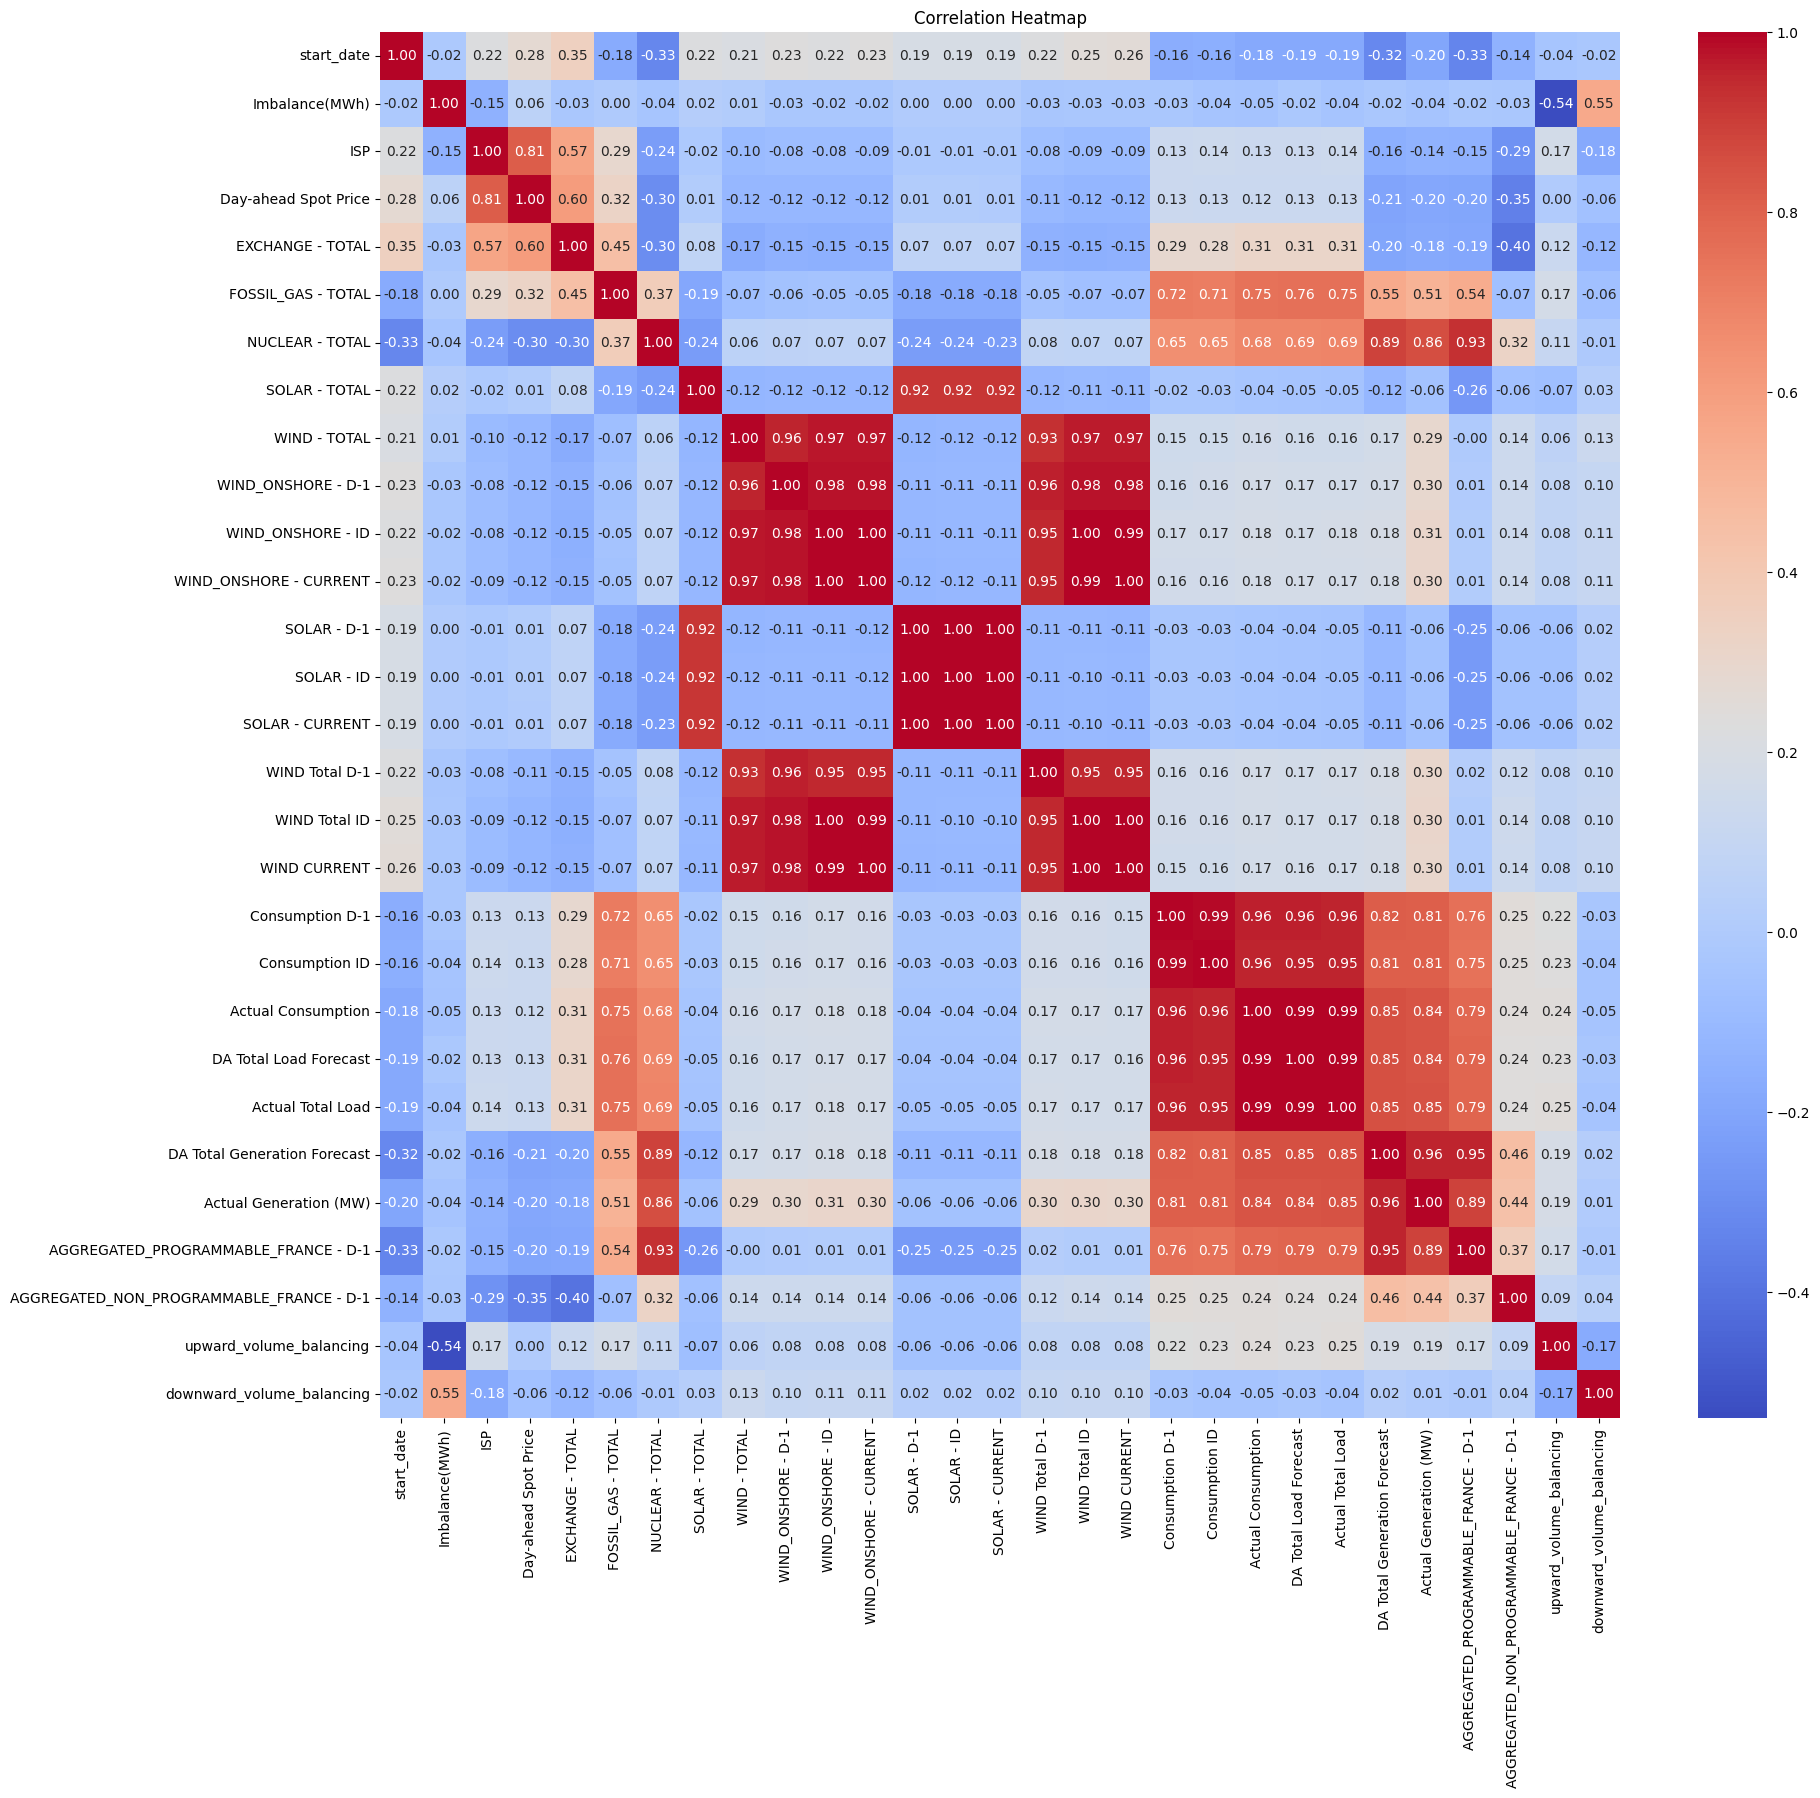

In [111]:
import seaborn as sns

plt.figure(figsize=(20, 18))
corr_matrix = df_merged.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

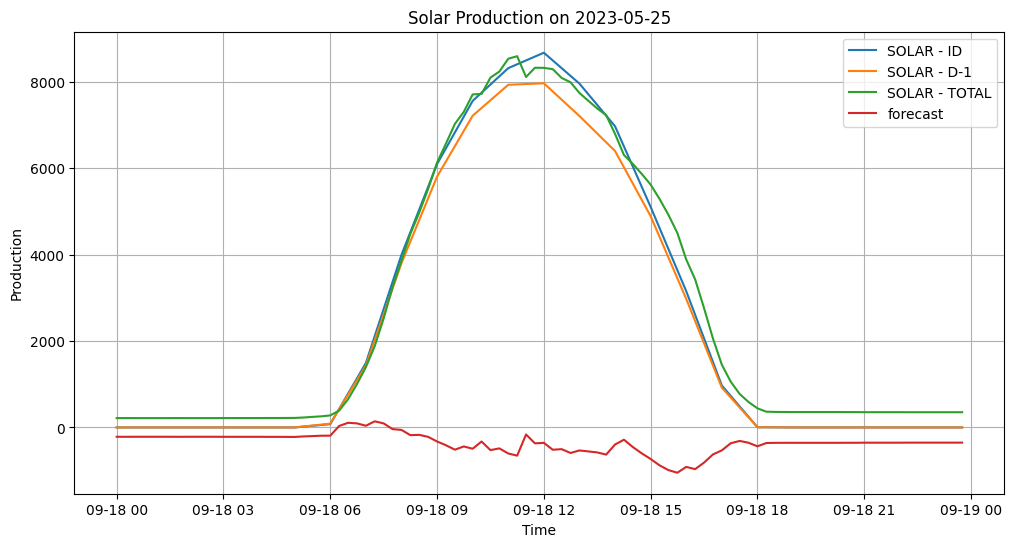

In [43]:
# Filter the dataframe for the date 2023-05-25
df_plot = df_merged[df_merged['start_date'].dt.date == pd.to_datetime('2023-09'
'-18').date()]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_plot['start_date'], df_plot['SOLAR - ID'], label='SOLAR - ID')
plt.plot(df_plot['start_date'], df_plot['SOLAR - D-1'], label='SOLAR - D-1')
plt.plot(df_plot['start_date'], df_plot['SOLAR - TOTAL'], label='SOLAR - TOTAL')
plt.plot(df_plot['start_date'], df_plot['SOLAR - D-1'] - df_plot['SOLAR - TOTAL'] , label='forecast')
plt.xlabel('Time')
plt.ylabel('Production')
plt.title('Solar Production on 2023-05-25')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
df_plot['SOLAR - TOTAL']

7012    174.0
7013    173.0
7014    172.0
7015    175.0
7016    174.0
        ...  
7103    173.0
7104    174.0
7105    172.0
7106    175.0
7107    172.0
Name: SOLAR - TOTAL, Length: 96, dtype: float64

save the dataframe

In [133]:
df_merged.describe()

,BIOENERGY - TOTAL,EXCHANGE - TOTAL,FOSSIL_GAS - TOTAL,FOSSIL_HARD_COAL - TOTAL,FOSSIL_OIL - TOTAL,HYDRO - TOTAL,NUCLEAR - TOTAL,PUMPING - TOTAL,SOLAR - TOTAL,WIND - TOTAL,...,WIND Total D-1,WIND Total ID,WIND CURRENT,Consumption Forecast - D-1,Consumption Forecast - ID,Actual Consumption,DA Total Load Forecast,Actual Total Load,DA Total Generation Forecast,Actual Generation (MW)
count,139626.000000,95590.000000,140107.000000,139488.000000,140107.000000,140107.000000,140107.000000,132423.000000,140107.000000,140107.000000,...,140256.000000,140256.000000,140256.000000,139822.000000,140008.000000,140010.000000,140252.000000,140252.000000,140252.000000,140252.000000
mean,795.637482,-2603.114750,3419.791074,244.907304,187.418851,6801.431684,37525.700336,-796.364657,2264.758770,4728.280621,...,4746.073113,4553.310006,4992.258640,50410.653695,50328.048569,50369.688644,50400.879198,50376.393991,53158.859098,56123.428783
std,144.277313,5948.462503,2451.527079,441.523434,143.681475,2783.503869,6925.218762,939.034111,3020.023479,3526.926282,...,3732.676552,3931.823897,3793.020562,11024.179305,11046.766428,10863.884738,10974.855281,10826.548607,9403.464814,9372.065056
min,-31591.000000,-17527.000000,0.000000,-2490.000000,0.000000,0.000000,0.000000,-4070.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,27500.000000,0.000000,20400.000000,27650.000000,28744.000000,26852.000000,0.000000
25%,718.000000,-7429.000000,1269.500000,10.000000,133.000000,4707.000000,32681.000000,-1409.000000,196.000000,2059.000000,...,2116.396250,1817.285000,2230.377500,42250.000000,42400.000000,42448.000000,42287.500000,42427.500000,47696.879677,51135.437500
50%,795.000000,-2660.000000,2943.000000,28.000000,146.000000,6516.000000,38460.000000,-381.000000,301.000000,3551.000000,...,3575.080000,3331.579450,3766.482500,48550.000000,48500.000000,48484.000000,48500.000000,48456.375000,51613.303721,56484.129888
75%,856.000000,1990.750000,5002.000000,356.000000,191.000000,8475.000000,42226.000000,-26.000000,3878.000000,6475.000000,...,6318.113125,6218.800000,6611.170000,57300.000000,57200.000000,57151.000000,57300.000000,57156.250000,58415.218750,60419.532286
max,4060.000000,14523.000000,9780.000000,2379.000000,1507.000000,37468.000000,53046.000000,0.000000,15265.000000,19307.000000,...,21352.380000,21610.520000,21467.250000,88000.000000,88500.000000,88514.000000,87850.000000,88174.000000,87642.000000,89482.000000


In [95]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122736 entries, 0 to 122735
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype              
---  ------                                    --------------   -----              
 0   start_date                                122736 non-null  datetime64[ns, UTC]
 1   Imbalance(MWh)                            122736 non-null  float64            
 2   ISP                                       122736 non-null  float64            
 3   Day-ahead Spot Price                      122736 non-null  float64            
 4   EXCHANGE - TOTAL                          100281 non-null  float64            
 5   FOSSIL_GAS - TOTAL                        122736 non-null  float64            
 6   NUCLEAR - TOTAL                           122736 non-null  float64            
 7   SOLAR - TOTAL                             122736 non-null  float64            
 8   WIND - TOTAL                              12

### Correct incoherent data



In [ ]:
# Remove last 48 hours because of missing data

df = df.loc[df['start_date'] < '2024-12-29 23:00:00+00:00']

# Replace with the previous value becuase clearly the data is wrong
df.loc[df['Actual Generation (MW)'] < 10000, 'Actual Generation (MW)'] = df['Actual Generation (MW)'].shift(1)

# Replace with the previous week value because nuclear production is never 0
df.loc[df['NUCLEAR - TOTAL'] == 0, 'NUCLEAR - TOTAL'] = df['NUCLEAR - TOTAL'].shift(7 * 48)

#Take day ahead forecat when missing data
df.loc[df['WIND Total ID'] == 0, 'WIND Total ID'] = df.loc[df['WIND Total ID'] == 0, 'WIND Total D-1']
df.loc[df['SOLAR - ID'].isna(), 'SOLAR - ID'] = df.loc[df['SOLAR - ID'].isna(), 'SOLAR - D-1']


### Creation of new features

In [ ]:
# Compute the difference between the actual and forecasted values

df['SOLAR DEVIATION'] = (df['SOLAR - TOTAL'] - df['SOLAR - ID']).round(2)
df['SOLAR DEVIATION CURRENT'] = (df['SOLAR - TOTAL'] - df['SOLAR - CURRENT']).round(2)
df['WIND DEVIATION'] = (df['WIND - TOTAL'] - df['WIND Total ID']).round(2)
df['WIND DEVIATION CURRENT'] = (df['WIND - TOTAL'] - df['WIND CURRENT']).round(2)
df['LOAD DEVIATION'] = (df['Actual Total Load'] - df['DA Total Load Forecast']).round(2)
df['CONSUMPTION DEVIATION'] = df['Actual Consumption'] - df['Consumption ID'].round(2)


In [ ]:
#Compute the ratio of non-programmable to programmable generation

df['PROGRAMMABLE RATIO D-1'] = (df['AGGREGATED_NON_PROGRAMMABLE_FRANCE - D-1']/ df['AGGREGATED_PROGRAMMABLE_FRANCE - D-1']).round(3)

In [ ]:
# Remove columns with actual values as not available at time of forecasting
actual_col = [col for col in df.columns if 'actual' in col.lower()]
df.drop(actual_col, axis=1, inplace=True)
df.drop(['SOLAR - TOTAL', 'WIND - TOTAL', 'EXCHANGE - TOTAL','FOSSIL_GAS - TOTAL', 'NUCLEAR - TOTAL' ], axis=1, inplace=True)


In [ ]:
# Rename some columns 
deviation_col = [col for col in df.columns if 'deviation' in col.lower()]
share_col = [col for col in df.columns if 'share' in col.lower()]


to_lag = deviation_col + share_col + ['ISP', 'upward_volume_balancing', 'downward_volume_balancing']
df[to_lag] = df[to_lag].shift(1)
df.rename(columns={col: f"{col} (lag1)" for col in to_lag}, inplace=True)
df.rename(columns={'Imbalance(MWh)': 'Imbalance'}, inplace=True)

In [ ]:
# Save as CSV
df.to_csv(r"D:\Oscar\Documents\Python\Projects\Thesis\Big Data\data_ml_new.csv", index=False)